## Tarea #2 (Grupos de dos integrantes)

## Estudiantes: Nayely Márquez y Fabián Parra


Crear un ambiente de trabajo (.ipynb) basado en PYTHON3 y llamarle Tarea-2.ipynb, con las librerías que
considere oportuno, en especial debe contar con PANDAS.
El objetivo de la Tarea 2 consiste en elegir un dataset, ejecutar las diferentes tareas de pre-procesado y crear
un tutorial sobre el uso de PANDAS considerando los siguientes aspectos:

• Debe ser dirigido a una audiencia con poca experiencia en el tema, imagine que bajo su rol de
Científico de Datos, le han asignado un colaborador unior al que usted le corresponde alinearlo con
los procesos de aprendizaje autom´tico, en particular con el uso de PANDAS en labores de pre-procesado.

• Debe enfocarse en especial en aspectos al pre-procesado de datos.

• Se recomienda el uso de un dataset ejemplo, que permita “jugar” con las diferentes técnicas de PANDAS
para pre-procesado. Tome en cuenta que NO solo se trata de un ejercicio de pre-procesado
de un dataset, sino que adicionalmente debe construir un TUTORIAL sobre el uso de PANDAS,
usando como base el dataset elegido.

• Recuerde seguir las buenas prácticas de comunicación efectiva, como parte de la notebook, utilizando
los recursos que considere oportunos.

• Recuerde llevar a cabo el EDA y explotar al máximo la visualización, puede usar matplotlib con
estilos varios, pero se recomienda instalar al menos otra librería extra de visualización, como Bokeh o
Seaborn. No olvide que el uso de la librería extra para la visualización, debe ser parte del
tutorial.

• Siéntase en libertad de agregar cualquier “truco” que considere oportuno o feature reciente incorporado
a PANDAS!


# Introducción

El objetivo del presente documento es implementar un ejemplo básico de exploración de datos.

# Datos:

### Heart

Los datos que utiliza el ejemplo están disponibles en Kaggle.com. Una descripción completa del conjunto de datos está disponible en https://www.kaggle.com/fedesoriano/heart-failure-prediction

Descripción de la estructura de datos:

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
#pip install bokeh

Inicialmente se deben cargar las librerías, esto se debe hacer con el comando **import** como se observa a continuación:

In [2]:
import bokeh as bkh
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics as st

Para cargar los datos debemos utilizar la librería **pandas**, utilizamos el comando **pd.read_csv** (pd es el "nombre" que le pusimos anteriormente al utilizar *import pandas as pd*). Primero debe ir el directorio donde están los datos y posteriormente el caracter que se necesario para separar los datos.

In [3]:
df = pd.read_csv(
    'D:/50688/Fabian/TEC/Aprendizaje Automatico/Tarea 2/heart.csv', sep=",",header=0)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,Male,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,Male,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,Male,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,Female,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Al observar los datos podemos ver algunas inconsistencias, por ejemplo en la variable **Sex** utilizan diferentes códigos para Masculino y Femenino, además **ExerciseAngina** es una variable que podemos tener en 0 y 1.

Podemos saber si hay otros códigos en Sex utilizando:

In [4]:
df['Sex'].unique()

array(['M', 'F', 'Mal', 'FeMal', 'Male', 'Female'], dtype=object)

Vamos a utilizar **replace** para corregir esto, primero colocamos el valor que queremos reemplazar y luego el que queremos obtener.

In [5]:
df.Sex.replace(to_replace='F', value = "Female", inplace = True)
df.Sex.replace(to_replace='M', value = "Male", inplace = True)
df.Sex.replace(to_replace='FeMal', value = "Female", inplace = True)
df.Sex.replace(to_replace='Mal', value = "Male", inplace = True)
df.ExerciseAngina.replace(to_replace='Y', value = 1, inplace = True)
df.ExerciseAngina.replace(to_replace='N', value = 0, inplace = True)

df['Sex'].unique() #verificar 

array(['Male', 'Female'], dtype=object)

De antemano sabemos que algunas variables tienen valores faltantes con **N**, como el siguiente ejemplo.
Esta es una forma de filtrar un valor en específico utilizando iloc, por ejemplo queremos saber cuales características tiene la persona 15.


In [6]:
df.iloc[15,:]

Age                   54
Sex               Female
ChestPainType        ATA
RestingBP              N
Cholesterol            N
FastingBS              0
RestingECG        Normal
MaxHR                150
ExerciseAngina         0
Oldpeak              1.5
ST_Slope            Flat
HeartDisease           0
Name: 15, dtype: object

También lo podemos corregir con replace utilizando np.nan

In [7]:
df.RestingBP.replace(to_replace='N', value = np.nan, inplace = True)
df.Cholesterol.replace(to_replace='N', value = np.nan, inplace = True)
df.MaxHR.replace(to_replace='N', value = np.nan, inplace = True)
print(df.iloc[15,:])


Age                   54
Sex               Female
ChestPainType        ATA
RestingBP            NaN
Cholesterol          NaN
FastingBS              0
RestingECG        Normal
MaxHR                150
ExerciseAngina         0
Oldpeak              1.5
ST_Slope            Flat
HeartDisease           0
Name: 15, dtype: object


Los **NA** se pueden trabajar de diferentes formas, en este caso los vamos a reemplazar con la mediana.

In [8]:
df.median()

Age                54.0
RestingBP         130.0
Cholesterol       223.0
FastingBS           0.0
MaxHR             138.0
ExerciseAngina      0.0
Oldpeak             0.6
HeartDisease        1.0
dtype: float64

In [9]:
df.fillna(df.median(), inplace = True)
df.iloc[15,:]

Age                   54
Sex               Female
ChestPainType        ATA
RestingBP          130.0
Cholesterol        223.0
FastingBS              0
RestingECG        Normal
MaxHR                150
ExerciseAngina         0
Oldpeak              1.5
ST_Slope            Flat
HeartDisease           0
Name: 15, dtype: object

En cualquier análisis que hagamos es importante conocer los tipos de datos con los que estamos trabajando, esto lo hacemos con:

In [10]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP          object
Cholesterol        object
FastingBS           int64
RestingECG         object
MaxHR              object
ExerciseAngina      int64
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Podemos observar que algunas variables tienen **object**, estos datos numéricos podemos trabajarlos como float.

In [11]:
df.Cholesterol=df.Cholesterol.astype(float)
df.RestingBP=df.RestingBP.astype(float)
df.MaxHR=df.MaxHR.astype(float)
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR             float64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Debemos saber como resumir nuestros datos de forma sencilla.

Algunas formas de hacerlo es usando **head** que nos permite ver nuestros primeros datos o **tail** que nos muestra los últimos.

In [12]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,Male,ATA,140.0,289.0,0,Normal,172.0,0,0.0,Up,0
1,49,Female,NAP,160.0,180.0,0,Normal,156.0,0,1.0,Flat,1
2,37,Male,ATA,130.0,283.0,0,ST,98.0,0,0.0,Up,0
3,48,Female,ASY,138.0,214.0,0,Normal,108.0,1,1.5,Flat,1
4,54,Male,NAP,150.0,195.0,0,Normal,122.0,0,0.0,Up,0


In [13]:
df.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,Male,TA,110.0,264.0,0,Normal,132.0,0,1.2,Flat,1
914,68,Male,ASY,144.0,193.0,1,Normal,141.0,0,3.4,Flat,1
915,57,Male,ASY,130.0,131.0,0,Normal,115.0,1,1.2,Flat,1
916,57,Female,ATA,130.0,236.0,0,LVH,174.0,0,0.0,Flat,1
917,38,Male,NAP,138.0,175.0,0,Normal,173.0,0,0.0,Up,0


Un comando muy útil que nos permite obtener un resumen de nuestros datos es **describe**, podemos observar medidas de posición, el mínimo, máximo, entre otros.

In [14]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.422658,198.653595,0.233115,137.042484,0.404139,0.887364,0.553377
std,9.432617,18.504855,109.268480,0.423046,26.421203,0.490992,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,46.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,266.750000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,293.000000,1.000000,6.200000,1.000000


Para crear un gráfico podemos usar una función donde primero colocamos nuestros datos, luego la variable que queremos en el *eje x* y *eje y*, después sus respectivos títulos y finalmente el título del gráfico

Debemos prestarle atención a los valores extremos, con el siguiente gráfico podemos observar valores de MaxHR que están por encima de 250 y uno por debajo de 50 cuando estos deberían estar entre 60 y 202. 

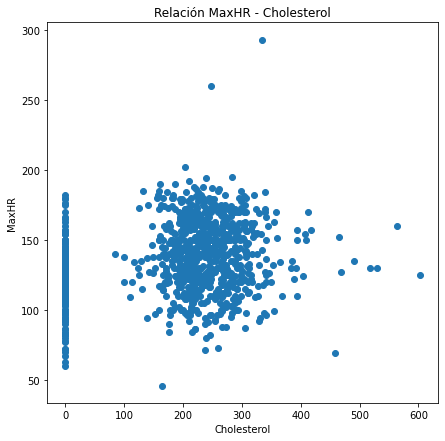

In [15]:
# Observe los datos atípicos

def plot_data(df, col_x, col_y, label_x, label_y, val_title):
    # Imprime gráfica de dispersión. 
    
    plt.figure(figsize=(7,7))
    plt.scatter(x=df[col_x],y=df[col_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(val_title)
    plt.show()
    
plot_data(df, 'Cholesterol', 'MaxHR', 'Cholesterol', 'MaxHR',
          'Relación MaxHR - Cholesterol') 


Podemos corregir esto filtrando los datos que cumplan los valores establecidos.

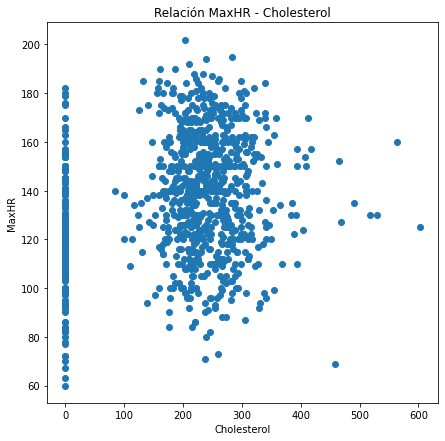

In [16]:
df=df[df.MaxHR <250]
df=df[df.MaxHR >=60]
plot_data(df, 'Cholesterol', 'MaxHR', 'Cholesterol', 'MaxHR',
          'Relación MaxHR - Cholesterol') 

Algo similar pasa con RestingBP al tener valores en 0 y en Colesterol con valores mayores a 600.

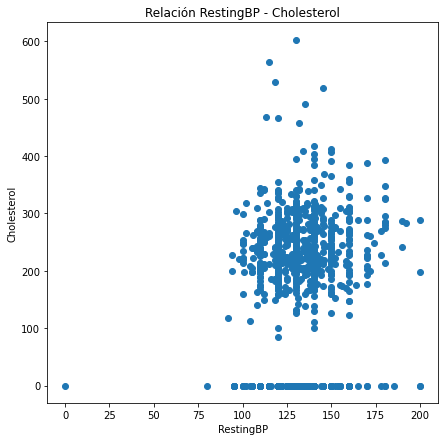

In [17]:
plot_data(df,'RestingBP', 'Cholesterol', 'RestingBP','Cholesterol',
          'Relación RestingBP - Cholesterol')    


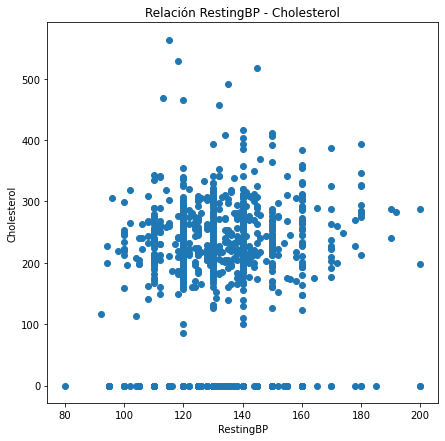

In [18]:
df=df[df.RestingBP >=75]
df=df[df.Cholesterol <600]
plot_data(df,'RestingBP', 'Cholesterol', 'RestingBP','Cholesterol',
          'Relación RestingBP - Cholesterol')    


Nota: hay otras formas para decidir si un valor es extremo o no, en este caso solo nos interesa ejemplificar el manejo de los datos.

Se puede hacer este gráfico de forma general, al tener más variables se dificulta ver valores extremos pero funciona muy bien para ver tendencias en los datos.

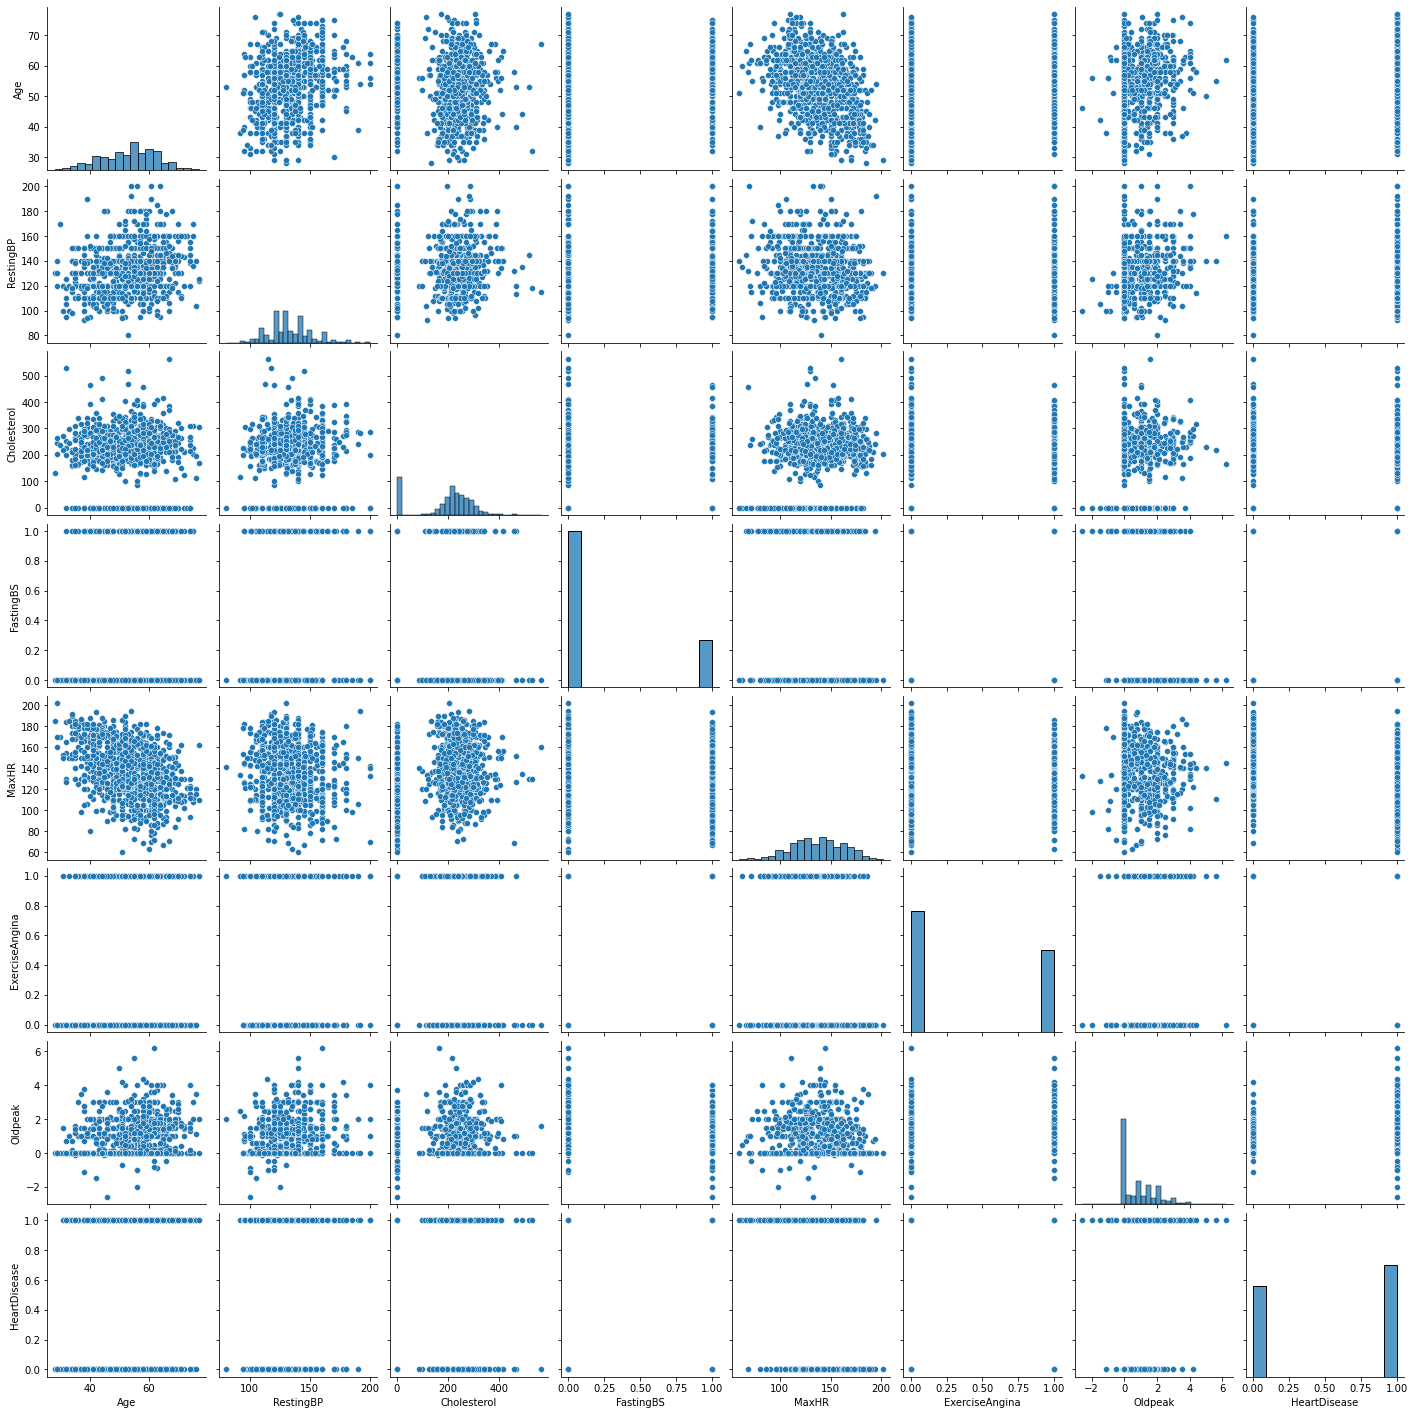

In [19]:
sns.pairplot(df);

Otro gráfico interesante es el de calor, con este podemos observar las correlaciones entre todas las variables, donde colores más fuertes representan correlacciones más altas, siendo azul correlación negativa y rojo positiva.

Si queremos crear este gráfico solo es necesario utilizar la función con nuestros datos.

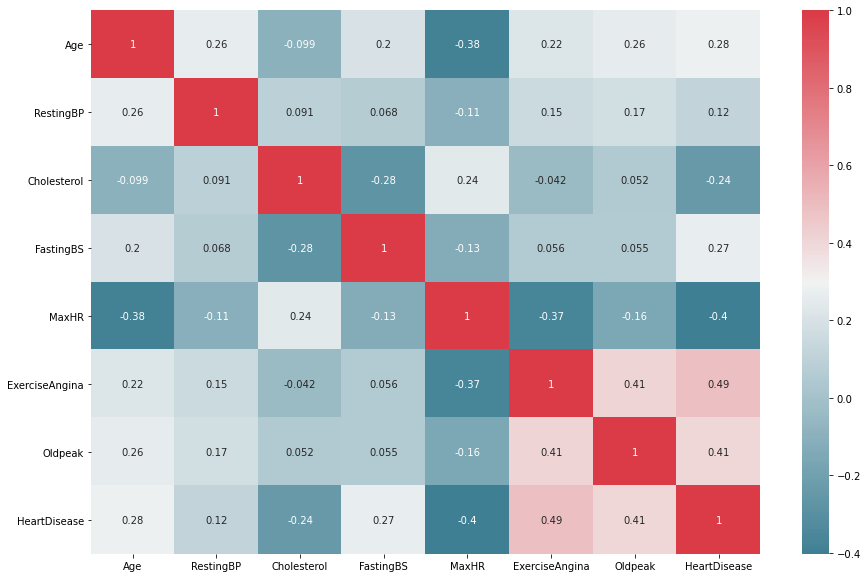

In [20]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

También tenemos una forma de representación gráfica muy común, el gráfico de barras. Es necesario colocar las dos variables de interés, en este caso Sex y HeartDisease. Con esto podemos observar que hay una mayor cantidad de hombres y en estos hay una mayor proporción de enfermedades cardíacas.

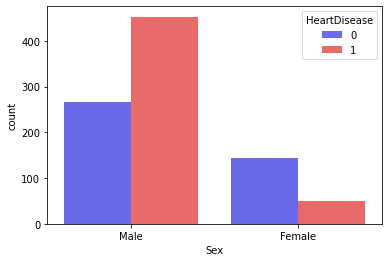

In [21]:
plt.figure()
sns.countplot(x='Sex', hue='HeartDisease', data=df, palette='seismic')
plt.xticks([0,1], ['Male', 'Female'])
plt.show()

Esta información también la podemos visualizar en un cuadro utilizando la función crosstab de Pandas. Primero se coloca la variable que queremos en las filas y después la que va en las columnas.

In [22]:
pd.crosstab(df['Sex'], df['HeartDisease'],margins=True)

HeartDisease,0,1,All
Sex,,,
Female,143,50,193
Male,267,453,720
All,410,503,913
